# Cyclistic bike-share analysis

## Introduction

This project is about a bike-share company called Cyclistic,whose marketing team needs to understand how annual members and casual riders use their bikes differently ,why casual riders would buy memberships and how they can use digital media to encourage riders to become members.

## Data Description

The dataset comes from Google Data Analytics certificate course and for the purposes of a case study.The data has been made available by Motivate International Inc. under this
license(https://divvybikes.com/data-license-agreement).
For this project,the data is given for the whole 2023.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
#Combine 12 monthly csv files into one dataframe

file_names=[r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202301-divvy-tripdata.csv",
            r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202302-divvy-tripdata.csv",
            r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202303-divvy-tripdata.csv",
            r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202304-divvy-tripdata.csv",
            r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202305-divvy-tripdata.csv",
            r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202306-divvy-tripdata.csv",
            r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202307-divvy-tripdata.csv",
            r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202308-divvy-tripdata.csv",
            r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202309-divvy-tripdata.csv",
            r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202310-divvy-tripdata.csv",
            r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202311-divvy-tripdata.csv",
            r"C:\Users\syuan\OneDrive\바탕 화면\DA\cyclist_share_project\Dataset\202312-divvy-tripdata.csv"]
dfs = []
for file in file_names:
    df = pd.read_csv(file)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

In [4]:
combined_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


In [6]:
#Check if there are nulls
combined_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

In [7]:
combined_df.dropna(inplace=True)

In [8]:
#Check if there are duplicates
combined_df.duplicated().sum()

0

In [9]:
#Convert 'started_at' and 'ended_at' columns to datetime
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'])
combined_df['ended_at'] = pd.to_datetime(combined_df['ended_at'])


In [10]:
#Calculate 'ride_time'
combined_df['ride_time']=(combined_df['ended_at']-combined_df['started_at']).dt.total_seconds()/60

In [11]:
#Check if there are outliers
avg_time_difference=combined_df['ride_time'].mean()
print("avg_ride_time:",avg_time_difference)

max_time_difference=combined_df['ride_time'].max()
print("max_ride_time:",max_time_difference)

min_time_difference=combined_df['ride_time'].min()
print("min_difference:",min_time_difference)

avg_ride_time: 15.951847989718605
max_ride_time: 12136.3
min_difference: -54.56666666666667


In [12]:
#Remove outliers
Q1=combined_df['ride_time'].quantile(0.25)
Q3=combined_df['ride_time'].quantile(0.75)
IQR=Q3-Q1

upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

outliers=combined_df[(combined_df['ride_time']<lower_limit)|(combined_df['ride_time']>upper_limit)]
combined_df=combined_df.drop(outliers.index)

In [13]:
avg_time_difference=combined_df['ride_time'].mean()
print("avg_ride_time:",avg_time_difference)

max_time_difference=combined_df['ride_time'].max()
print("max_ride_time:",max_time_difference)

min_time_difference=combined_df['ride_time'].min()
print("min_difference:",min_time_difference)

avg_ride_time: 11.099252043916263
max_ride_time: 35.28333333333333
min_difference: -11.6


In [14]:
#The minimum difference is still negative,which doesn't make sense.Any ride_time shorter than 0 should be removed.
negative_ride_time=combined_df[(combined_df['ride_time']<0)]
combined_df=combined_df.drop(negative_ride_time.index)

In [15]:
avg_time_difference=combined_df['ride_time'].mean()
print("avg_ride_time:",avg_time_difference)

max_time_difference=combined_df['ride_time'].max()
print("max_ride_time:",max_time_difference)

min_time_difference=combined_df['ride_time'].min()
print("min_difference:",min_time_difference)

avg_ride_time: 11.09935329848536
max_ride_time: 35.28333333333333
min_difference: 0.0


In [16]:
#Find out the number of rides by members and casual riders
num=combined_df.groupby('member_casual')['ride_id'].size().reset_index(name='count')
num

,member_casual,count
0,casual,1304663
1,member,2699013


In [17]:
#Find out the avg ride time of memebers and casual riders
avg_ride_time=combined_df.groupby('member_casual')['ride_time'].mean().round(0).reset_index(name='avg_ride_time')
avg_ride_time

,member_casual,avg_ride_time
0,casual,13.0
1,member,10.0


In [18]:
#Find out the days of the rides
combined_df['ride_day']=combined_df['started_at'].dt.day_name()

In [19]:
#Find out on which day most riders use bikes
most_rides_day=combined_df.groupby(['ride_day','member_casual'])['ride_id'].count().reset_index(name='count')
most_rides_day.sort_values(by='count',ascending=False)

,ride_day,member_casual,count
13,Wednesday,member,439991
9,Thursday,member,439245
11,Tuesday,member,435292
1,Friday,member,386477
3,Monday,member,374438
5,Saturday,member,332513
7,Sunday,member,291057
4,Saturday,casual,253452
6,Sunday,casual,206050
0,Friday,casual,196065


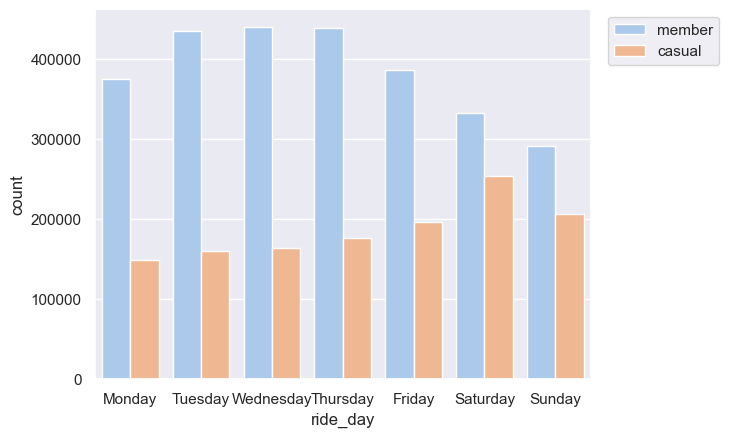

In [20]:
#Visualize the distribution of rides
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
most_rides_day['ride_day'] = pd.Categorical(most_rides_day['ride_day'], categories=day_order, ordered=True)
sns.barplot(data=most_rides_day,x='ride_day',y='count',hue='member_casual', hue_order=['member', 'casual'],palette='pastel')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
sns.set_style('whitegrid')

In [21]:
most_rides_day_all=combined_df.groupby('ride_day')['ride_id'].count().reset_index(name='count')
most_rides_day_all.sort_values(by='count',ascending=False)

,ride_day,count
4,Thursday,616083
6,Wednesday,603489
5,Tuesday,594913
2,Saturday,585965
0,Friday,582542
1,Monday,523577
3,Sunday,497107


Overall,bikes are most used on Thursday and least on Sunday.However,if counts are grouped by membership status,members use bikes most on weekdays while non-members use bikes most on weekends.Apart from that,although the number of members is more than double that of non-members, the avg ride time of non members is longer than that of members by 3 minutes.

In [22]:
#Find out what time in a day bikes are mostly used
combined_df['start_time']=combined_df['started_at'].dt.hour
combined_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,ride_day,start_time
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,10.850000,Saturday,20
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.483333,Tuesday,15
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,13.233333,Monday,7
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.766667,Sunday,10
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,15.316667,Thursday,13


In [23]:
start_time_all=combined_df.groupby('start_time')['ride_id'].count().reset_index(name='count')

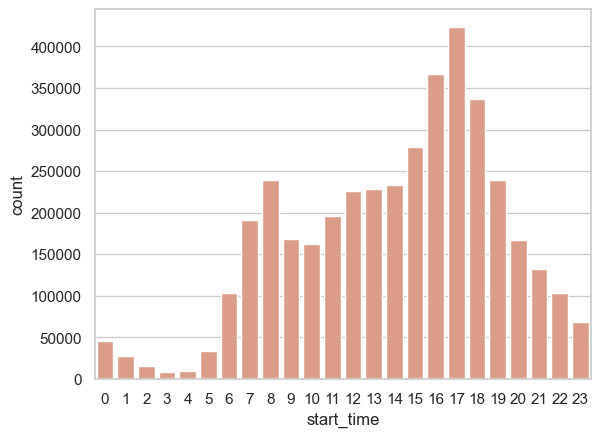

In [24]:
sns.barplot(data=start_time_all,x='start_time',y='count',color='darksalmon')
sns.set_style('whitegrid')

In [25]:
start_time=combined_df.groupby(['start_time','member_casual'])['ride_id'].count().reset_index(name='count')
start_time.sort_values(by='count',ascending=False)

,start_time,member_casual,count
35,17,member,291689
33,16,member,248917
37,18,member,225703
17,8,member,190915
31,15,member,181246
39,19,member,157491
15,7,member,154862
29,14,member,146110
25,12,member,145734
27,13,member,144743


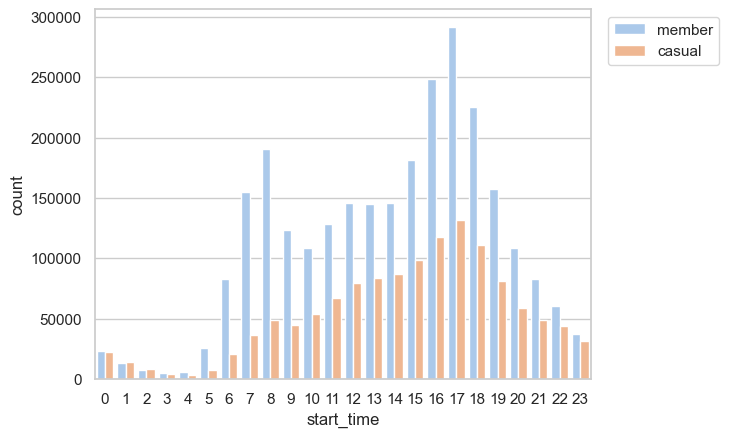

In [26]:
sns.barplot(data=start_time,x='start_time',y='count',hue='member_casual', hue_order=['member', 'casual'],palette='pastel')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
sns.set_style('whitegrid')

Members ride most at 7 to 8 and 16 to 18 o'clock while casual riders ride most at 16 to 18 o'clock.

In [27]:
#Find out in what month bikes are mostly used
combined_df['start_month']=combined_df['started_at'].dt.month
combined_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,ride_day,start_time,start_month
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,10.850000,Saturday,20,1
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.483333,Tuesday,15,1
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,13.233333,Monday,7,1
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.766667,Sunday,10,1
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,15.316667,Thursday,13,1


In [28]:
start_month_all=combined_df.groupby('start_month')['ride_id'].count().reset_index(name='count')
start_month_all.sort_values(by='count',ascending=False)

,start_month,count
7,8,532654
6,7,515722
5,6,487277
8,9,463089
4,5,420854
9,10,378265
3,4,300348
10,11,262652
2,3,193510
11,12,161239


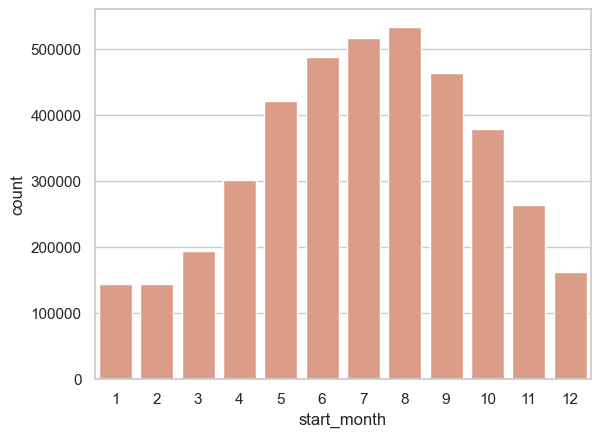

In [29]:
sns.barplot(data=start_month_all,x='start_month',y='count',color='darksalmon')
sns.set_style('whitegrid')

In [30]:
start_month=combined_df.groupby(['start_month','member_casual'])['ride_id'].count().reset_index(name='count')
start_month.sort_values(by='count',ascending=False)

,start_month,member_casual,count
15,8,member,335615
13,7,member,313295
11,6,member,302012
17,9,member,297261
9,5,member,274242
19,10,member,265058
7,4,member,206415
12,7,casual,202427
21,11,member,197287
14,8,casual,197039


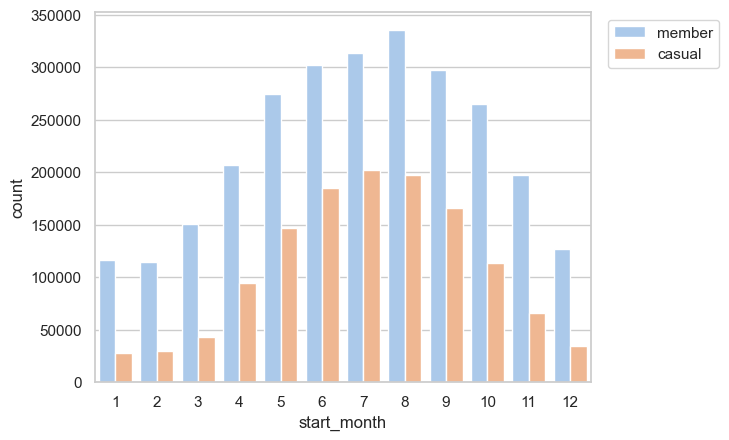

In [31]:
sns.barplot(data=start_month,x='start_month',y='count',hue='member_casual', hue_order=['member', 'casual'],palette='pastel')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
sns.set_style('whitegrid')

Both members and casual riders ride mostly in Summer (during June,July and August) and ride least in Winter (during December, January and February).

In [32]:
#Find out bikes are used starting most at which station 
most_start_station_all=combined_df.groupby('start_station_name')['ride_id'].count().reset_index(name='count')
most_start_station_all_sorted=most_start_station_all.sort_values(by='count',ascending=False)
most_start_station_all_sorted.head(10)

,start_station_name,count
1404,Streeter Dr & Grand Ave,43992
445,Kingsbury St & Kinzie St,31633
168,Clark St & Elm St,31543
195,Clinton St & Washington Blvd,29479
1457,Wells St & Concord Ln,28904
267,DuSable Lake Shore Dr & North Blvd,28387
1458,Wells St & Elm St,26703
266,DuSable Lake Shore Dr & Monroe St,26636
569,Michigan Ave & Oak St,26338
191,Clinton St & Madison St,24079


In [33]:
most_start_station=combined_df.groupby(['start_station_name','member_casual'])['ride_id'].count().reset_index(name='count')
most_start_station_sorted=most_start_station.sort_values(by='count',ascending=False)
most_start_station_sorted.head(10)

,start_station_name,member_casual,count
2581,Streeter Dr & Grand Ave,casual,29684
882,Kingsbury St & Kinzie St,member,23972
389,Clinton St & Washington Blvd,member,23940
335,Clark St & Elm St,member,22487
529,DuSable Lake Shore Dr & Monroe St,casual,19099
2688,Wells St & Concord Ln,member,18896
381,Clinton St & Madison St,member,18856
2690,Wells St & Elm St,member,18215
2618,University Ave & 57th St,member,17610
1042,Loomis St & Lexington St,member,17549


In [34]:
most_start_station_casual = combined_df[combined_df['member_casual'] == 'casual'].groupby('start_station_name').agg(
    count=pd.NamedAgg(column='ride_id', aggfunc='count'),
    start_lat=pd.NamedAgg(column='start_lat', aggfunc='first'),  
    start_lng=pd.NamedAgg(column='start_lng', aggfunc='first')  
).reset_index()

most_start_station_casual_sorted=most_start_station_casual.sort_values(by='count',ascending=False)
top_start_casual=most_start_station_casual_sorted.head(10)
top_start_casual

,start_station_name,count,start_lat,start_lng
1332,Streeter Dr & Grand Ave,29684,41.892278,-87.612043
265,DuSable Lake Shore Dr & Monroe St,19099,41.880958,-87.616743
266,DuSable Lake Shore Dr & North Blvd,15173,41.911722,-87.626804
567,Michigan Ave & Oak St,14118,41.900960,-87.623777
1253,Shedd Aquarium,13051,41.867280,-87.615330
573,Millennium Park,12315,41.881032,-87.624084
1336,Theater on the Lake,11663,41.926224,-87.630971
1385,Wells St & Concord Ln,10008,41.912133,-87.634656
269,Dusable Harbor,9981,41.886976,-87.612813
167,Clark St & Elm St,9056,41.902884,-87.631502


In [ ]:
pip install folium

In [35]:
#Visualize the stations on a map
import folium
from folium import plugins

# Create a dictionary with end station names as keys and (latitude, longitude) tuples as values
casual_start_stations_coordinates = dict(zip(top_start_casual['start_station_name'], 
                                zip(top_start_casual['start_lat'],top_start_casual['start_lng'])))

# Create a folium map centered around the first end station
map_center = casual_start_stations_coordinates[list(casual_start_stations_coordinates.keys())[0]]
my_map = folium.Map(location=map_center, zoom_start=13)

# Add markers for each end station
for station, (lat, lon) in casual_start_stations_coordinates.items():
    folium.Marker(location=(lat, lon), popup=station).add_to(my_map)

# Display the map
my_map.save('casual_start_stations_map.html')

import folium
from IPython.display import display, IFrame

# Save the map as an HTML file
html_file_path = 'casual_start_stations_map.html'
my_map.save(html_file_path)

# Display the map in the Jupyter Notebook using an iframe
display(IFrame(html_file_path, width=800, height=600))

In [36]:
most_start_station_member = combined_df[combined_df['member_casual'] == 'member'].groupby('start_station_name').agg(
    count=pd.NamedAgg(column='ride_id', aggfunc='count'),
    start_lat=pd.NamedAgg(column='start_lat', aggfunc='first'),  
    start_lng=pd.NamedAgg(column='start_lng', aggfunc='first')  
).reset_index()

most_start_station_member_sorted=most_start_station_member.sort_values(by='count',ascending=False)
top_start_member=most_start_station_member_sorted.head(10)
top_start_member

,start_station_name,count,start_lat,start_lng
438,Kingsbury St & Kinzie St,23972,41.889177,-87.638506
194,Clinton St & Washington Blvd,23940,41.883379,-87.641286
167,Clark St & Elm St,22487,41.902973,-87.631280
1302,Wells St & Concord Ln,18896,41.912133,-87.634656
190,Clinton St & Madison St,18856,41.882752,-87.641190
1303,Wells St & Elm St,18215,41.903222,-87.634324
1267,University Ave & 57th St,17610,41.791478,-87.599861
517,Loomis St & Lexington St,17549,41.872200,-87.661230
285,Ellis Ave & 60th St,16604,41.785097,-87.601073
66,Broadway & Barry Ave,16131,41.937582,-87.644098


In [ ]:
#Visualize the stations on a map
# Create a dictionary with end station names as keys and (latitude, longitude) tuples as values
member_start_stations_coordinates = dict(zip(top_start_member['start_station_name'], 
                                zip(top_start_member['start_lat'],top_start_member['start_lng'])))

# Create a folium map centered around the first end station
map_center = member_start_stations_coordinates[list(member_start_stations_coordinates.keys())[0]]
my_map = folium.Map(location=map_center, zoom_start=13)

# Add markers for each end station
for station, (lat, lon) in member_start_stations_coordinates.items():
    folium.Marker(location=(lat, lon), popup=station).add_to(my_map)

# Display the map
my_map.save('member_start_stations_map.html')


# Save the map as an HTML file
html_file_path = 'member_start_stations_map.html'
my_map.save(html_file_path)

# Display the map in the Jupyter Notebook using an iframe
display(IFrame(html_file_path, width=800, height=600))

In [37]:
#Find out bikes are parked most at which station 
most_end_station_all=combined_df.groupby('end_station_name')['ride_id'].count().reset_index(name='count')
most_end_station_all_sorted=most_end_station_all.sort_values(by='count',ascending=False)
most_end_station_all_sorted.head(10)

,end_station_name,count
1421,Streeter Dr & Grand Ave,43168
444,Kingsbury St & Kinzie St,31193
267,DuSable Lake Shore Dr & North Blvd,31027
168,Clark St & Elm St,30870
195,Clinton St & Washington Blvd,30601
1474,Wells St & Concord Ln,29890
1475,Wells St & Elm St,27142
568,Michigan Ave & Oak St,26619
191,Clinton St & Madison St,25410
66,Broadway & Barry Ave,24704


In [38]:
most_end_station=combined_df.groupby(['end_station_name','member_casual'])['ride_id'].count().reset_index(name='count')
most_end_station_sorted=most_end_station.sort_values(by='count',ascending=False)
most_end_station_sorted.head(10)

,end_station_name,member_casual,count
2614,Streeter Dr & Grand Ave,casual,31263
387,Clinton St & Washington Blvd,member,25324
881,Kingsbury St & Kinzie St,member,24108
333,Clark St & Elm St,member,22437
379,Clinton St & Madison St,member,20249
2721,Wells St & Concord Ln,member,19779
2723,Wells St & Elm St,member,18357
2651,University Ave & 57th St,member,18074
529,DuSable Lake Shore Dr & North Blvd,casual,17471
1042,Loomis St & Lexington St,member,17334


In [39]:
most_end_station_casual = combined_df[combined_df['member_casual'] == 'casual'].groupby('end_station_name').agg(
    count=pd.NamedAgg(column='ride_id', aggfunc='count'),
    end_lat=pd.NamedAgg(column='end_lat', aggfunc='first'),  
    end_lng=pd.NamedAgg(column='end_lng', aggfunc='first')  
).reset_index()

most_end_station_casual_sorted=most_end_station_casual.sort_values(by='count',ascending=False)
top_end_casual=most_end_station_casual_sorted.head(10)
top_end_casual


,end_station_name,count,end_lat,end_lng
1353,Streeter Dr & Grand Ave,31263,41.892278,-87.612043
267,DuSable Lake Shore Dr & North Blvd,17471,41.911722,-87.626804
266,DuSable Lake Shore Dr & Monroe St,16525,41.880958,-87.616743
568,Michigan Ave & Oak St,14772,41.900960,-87.623777
574,Millennium Park,14606,41.881032,-87.624084
1357,Theater on the Lake,11964,41.926277,-87.630834
1275,Shedd Aquarium,11350,41.867226,-87.615355
1406,Wells St & Concord Ln,10111,41.912133,-87.634656
175,Clark St & Lincoln Ave,9160,41.915689,-87.634600
162,Clark St & Armitage Ave,8832,41.918306,-87.636282


In [40]:
#Visualize the stations on a map
# Create a dictionary with end station names as keys and (latitude, longitude) tuples as values
end_stations_coordinates = dict(zip(top_end_casual['end_station_name'], 
                                zip(top_end_casual['end_lat'],top_end_casual['end_lng'])))

# Create a folium map centered around the first end station
map_center = end_stations_coordinates[list(end_stations_coordinates.keys())[0]]
my_map = folium.Map(location=map_center, zoom_start=13)

# Add markers for each end station
for station, (lat, lon) in end_stations_coordinates.items():
    folium.Marker(location=(lat, lon), popup=station).add_to(my_map)

# Display the map
my_map.save('casual_end_stations_map.html')


# Save the map as an HTML file
html_file_path = 'casual_end_stations_map.html'
my_map.save(html_file_path)

# Display the map in the Jupyter Notebook using an iframe
display(IFrame(html_file_path, width=800, height=600))



In [41]:
most_end_station_member = combined_df[combined_df['member_casual'] == 'member'].groupby('end_station_name').agg(
    count=pd.NamedAgg(column='ride_id', aggfunc='count'),
    end_lat=pd.NamedAgg(column='end_lat', aggfunc='first'),  
    end_lng=pd.NamedAgg(column='end_lng', aggfunc='first')  
).reset_index()

most_end_station_member_sorted=most_end_station_member.sort_values(by='count',ascending=False)
top_end_member=most_end_station_member_sorted.head(10)
top_end_member

,end_station_name,count,end_lat,end_lng
191,Clinton St & Washington Blvd,25324,41.883380,-87.641170
436,Kingsbury St & Kinzie St,24108,41.889177,-87.638506
164,Clark St & Elm St,22437,41.902973,-87.631280
187,Clinton St & Madison St,20249,41.882752,-87.641190
1314,Wells St & Concord Ln,19779,41.912133,-87.634656
1315,Wells St & Elm St,18357,41.903222,-87.634324
1279,University Ave & 57th St,18074,41.791478,-87.599861
516,Loomis St & Lexington St,17334,41.872229,-87.661364
63,Broadway & Barry Ave,16747,41.937582,-87.644098
1240,State St & Chicago Ave,16738,41.896617,-87.628579


In [42]:
#Visualize the stations on a map
# Create a dictionary with end station names as keys and (latitude, longitude) tuples as values
member_end_stations_coordinates = dict(zip(top_end_member['end_station_name'], 
                                zip(top_end_member['end_lat'],top_end_member['end_lng'])))

# Create a folium map centered around the first end station
map_center = member_end_stations_coordinates[list(member_end_stations_coordinates.keys())[0]]
my_map = folium.Map(location=map_center, zoom_start=13)

# Add markers for each end station
for station, (lat, lon) in member_end_stations_coordinates.items():
    folium.Marker(location=(lat, lon), popup=station).add_to(my_map)

# Display the map
my_map.save('member_end_stations_map.html')


# Save the map as an HTML file
html_file_path = 'member_end_stations_map.html'
my_map.save(html_file_path)

# Display the map in the Jupyter Notebook using an iframe
display(IFrame(html_file_path, width=800, height=600))

The start and end stations of members are near universities,restaurants,markets and residences while those of casual riders are near places for recreational activities such as a theater, a garden, an aquarium and parks.Streeter Dr & Grand Ave	station near Jane Addams Memorial Park is the station most bikers start and end at and most of the bikers are casual riders. 

In [43]:
#Find out what type of bikes members and casual bikers use respectively
type=combined_df.groupby('rideable_type')['ride_id'].count().reset_index(name='count')
type.sort_values(by='count',ascending=False)

,rideable_type,count
0,classic_bike,2455373
2,electric_bike,1502044
1,docked_bike,46259


In [44]:
type_by_membership=combined_df.groupby(['rideable_type','member_casual'])['ride_id'].count().reset_index(name='count')
type_by_membership.sort_values(by='count',ascending=False)

,rideable_type,member_casual,count
1,classic_bike,member,1735620
4,electric_bike,member,963393
0,classic_bike,casual,719753
3,electric_bike,casual,538651
2,docked_bike,casual,46259


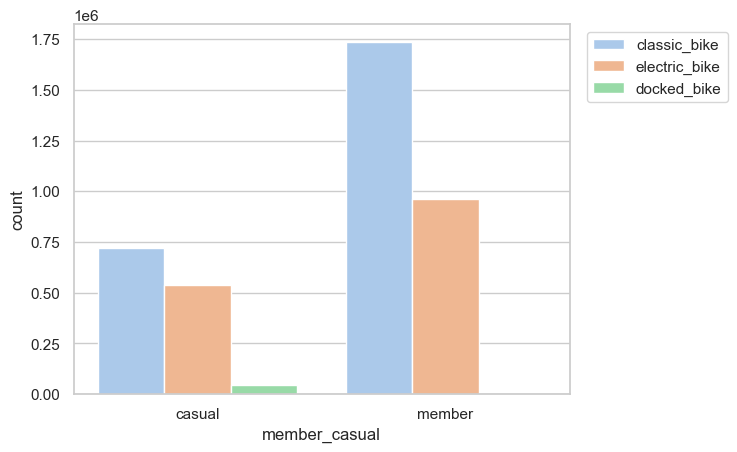

In [45]:
sns.barplot(data=type_by_membership,x='member_casual',y='count',
            hue='rideable_type',hue_order=['classic_bike','electric_bike','docked_bike'],palette='pastel')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
sns.set_style('whitegrid')

Both members and casual bikers mostly ride classic bikes and only casual bikes ride docked bikes.

In [ ]:
most_rides_day.to_csv('most_rides_day.csv')
num.to_csv('num.csv')
avg_ride_time.to_csv('avg_ride_time.csv')
most_rides_day_all.to_csv('most_rides_day_all.csv')

In [ ]:
start_time.to_csv('start_tme.csv')
start_month.to_csv('start_month.csv')
most_start_station_all.to_csv('most_start_station_all.csv')
most_start_station.to_csv('most_start_station.csv')
top_start_casual.to_csv('top_start_casual.csv')
top_start_member.to_csv('top_start_member.csv')
top_end_casual.to_csv('top_end_casual.csv')
top_end_member.to_csv('top_end_member.csv')
type_by_membership.to_csv('type_by_membership.csv')

## Conclusion

#### 1)Average ride time

Although the number of rides by members is more than double that by casual riders, the average ride time of casual riders is longer than that of members by 3 minutes.

#### 2)Day of a week when most riders ride

Overall,bikes are most used on Thursday and least on Sunday.However,if counts are grouped by membership status,members use bikes most on weekdays while casual riders use bikes most on weekends.

#### 3)Time of a day when most riders ride

Members ride most between 7 and 8 and between 16 to 18 o'clock while casual riders ride most between 16 and 18 o'clock.

#### 4)Month of a year when most riders ride

Both members and casual riders ride mostly in Summer (during June,July and August) and ride least in Winter (during December, January and February).

#### 5)Stations most rides started and ended

The start and end stations of rides by members are near universities,restaurants,markets and residences while those by casual riders are near places for recreational activities such as a theater, a garden, an aquarium and parks.Streeter Dr & Grand Ave station near Jane Addams Memorial Park is the station most riders start and end their rides at and most of the them are casual riders.

#### 6)Type of bike riders use

Both members and casual riders mostly ride classic bikes and only casual riders ride docked bikes.

## Recommendations

Through the analysis,members are found to contribute more but shorter rides on weekdays at rush-hours.Perhaps members use bikes to commute to work or school.Casual riders contribute longer rides and their rides are mostly on weekends during 16-18 o'clock.
Digital marketing campaigns could target casual riders and attract them with discounted rate for long rides if they subscribe to membership or offer them plans to accumulate miles to a certain amount in exchange for a free extention of membership.Other marketing methods could be focused at top 10 stations where casual riders make their trips on weekends.Since most casual riders make trips among tourist attractions,marketing strategies could include cooperations with those places such as entrance fee discounts for members.